# Digit Classification with Softmax

### Preparation

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

# PyTorch Library
import torch 
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to get the digit dataset
import torchvision.datasets as dsets
# Creating graphs
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np

/home/ihub-kbhaskar/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))
            
            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')
            
            ax.set_xticks([])
            ax.set_yticks([])
            
        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [3]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28,28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

### Make Some Data

In [4]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data_MNIST', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
# Create and print the validation dataset

validation_dataset = dsets.MNIST(root='./data_MNIST', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()


First Image and Label None


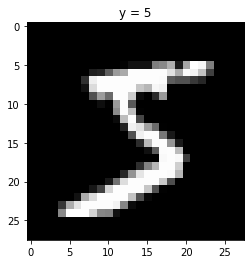

In [6]:
# Print the first image and label

print("First Image and Label", show_data(train_dataset[0]))

In [7]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


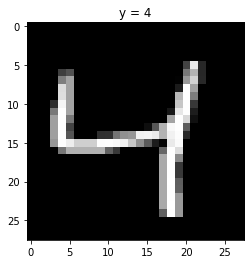

In [8]:
# Plot the image

show_data(train_dataset[2])

### Build a Softmax Classifer

In [9]:
# Define softmax classifier class
# Inherits nn.Module which is the base class for all neural networks
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        # Creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        # Runs the x value through the single layers defined above
        z = self.linear(x)
        return z

In [10]:
# Print the shape of the training dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [11]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

### Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model

In [12]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 possible digits the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [13]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


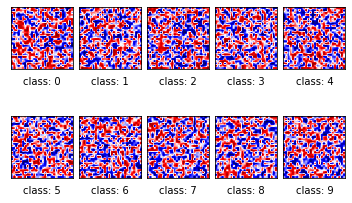

In [14]:
# Plot the model parameters for each class
# Since the model has not been trained yet the parameters look random

PlotParameters(model)

In [15]:
# First we get the X value of the first image
X = train_dataset[0][0]
# We can see the shape is 1 by 28 by 28, we need it to be flattened to 1 by 28 * 28 (784)
print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
# Now we can make a prediction, each class has a value, and the higher it is the more confident the model is that it is that digit
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[ 0.1356,  0.2653, -0.2506, -0.2846, -0.0017,  0.0373,  0.2088, -0.0464,
          0.1096, -0.0936]], grad_fn=<AddmmBackward0>)

In [16]:
# Define the learning rate, optimizer, criterion, and data loader

learning_rate = 0.1
# The optimizer will updates the model parameters using the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# The criterion will measure the loss between the prediction and actual label values
# This is where the SoftMax occurs, it is built into the Criterion Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

### How Cross Entropy Loss uses SoftMax

Output:  tensor([[ 0.1356,  0.2653, -0.2506, -0.2846, -0.0017,  0.0373,  0.2088, -0.0464,
          0.1096, -0.0936]], grad_fn=<AddmmBackward0>)
Actual:  tensor([5])


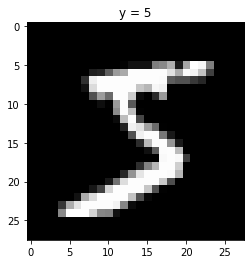

In [17]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual: ", actual)

In [18]:
criterion(model_output, actual)

tensor(2.2880, grad_fn=<NllLossBackward0>)

In [19]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.1119, 0.1275, 0.0761, 0.0735, 0.0976, 0.1015, 0.1205, 0.0933, 0.1091,
         0.0890]], grad_fn=<SoftmaxBackward0>)


In [20]:
-1*torch.log(probability[0][actual])

tensor([2.2880], grad_fn=<MulBackward0>)

### Train

In [21]:
# Number of times we train our model using the training data
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(validation_dataset)

# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
          
        # Each epoch we check how the model performs with data it has not seen which is the validation data, we are not training here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)
        

# Function call
train_model(n_epochs)

### Analyze Results

Text(0, 0.5, 'accuracy')

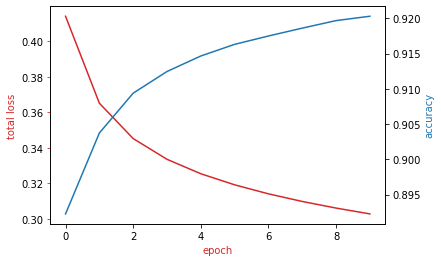

In [22]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(accuracy_list, color=color)
ax2.set_ylabel('accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

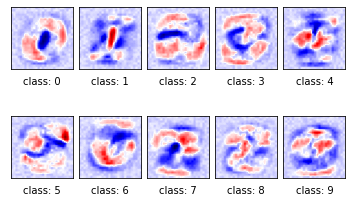

In [23]:
# Plot the parameters

PlotParameters(model)

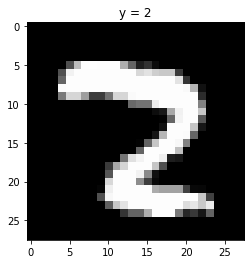

yhat: tensor([7])
Probaility of class  0.6501007080078125


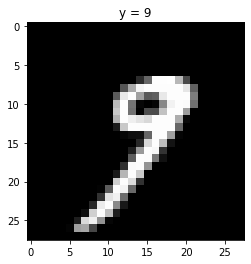

yhat: tensor([7])
Probaility of class  0.7100660800933838


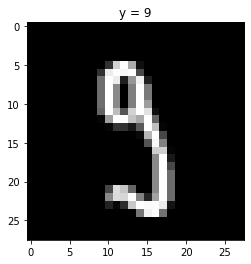

yhat: tensor([5])
Probaility of class  0.7238430380821228


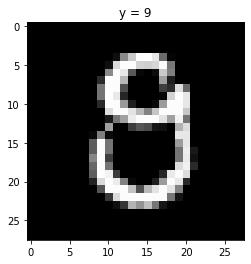

yhat: tensor([8])
Probaility of class  0.3618183434009552


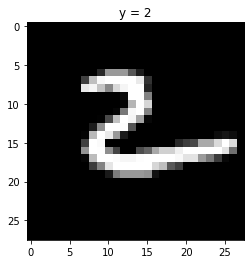

yhat: tensor([6])
Probaility of class  0.5089611411094666


In [24]:
# Plot the misclassified samples
Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print('yhat:', yhat)
        print('Probaility of class ', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

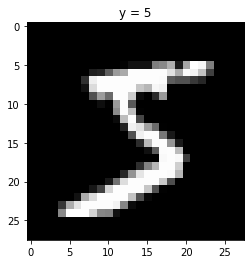

yhat: tensor([5])
probability of class  0.8591358661651611


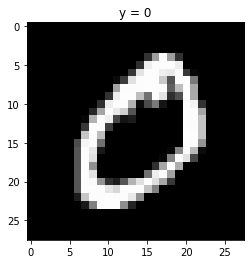

yhat: tensor([0])
probability of class  0.99970942735672


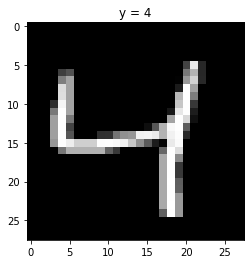

yhat: tensor([4])
probability of class  0.8697454333305359


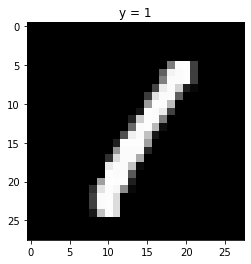

yhat: tensor([1])
probability of class  0.9656572937965393


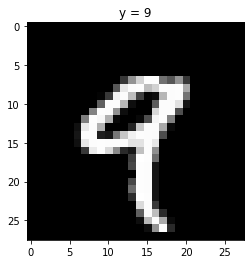

yhat: tensor([9])
probability of class  0.926700234413147


In [25]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print('yhat:', yhat)
        print('probability of class ', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break